In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/var/folders/ww/3csmp5ln1b9cpttvw31wchgr0000gp/T/ipykernel_11515/555797462.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
events_data=pd.read_csv('https://stepik.org/media/attachments/course/4852/event_data_train.zip')

In [3]:
events_data

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
...,...,...,...,...
3480698,33375,1526772685,viewed,11677
3480699,32815,1526772750,viewed,5198
3480700,32815,1526772750,discovered,5198
3480701,32815,1526772750,passed,5198


In [4]:
submissions_data=pd.read_csv('https://stepik.org/media/attachments/course/4852/submissions_data_train.zip')

In [5]:
submissions_data

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853
...,...,...,...,...
509099,120745,1501946959,wrong,2615
509100,120745,1503059927,correct,13177
509101,120745,1506348153,wrong,15253
509102,120745,1523035316,wrong,1424


In [6]:
#добавляем колонку читаемой даты
events_data['date'] =pd.to_datetime(events_data.timestamp, unit='s')
submissions_data['date'] =pd.to_datetime(submissions_data.timestamp, unit='s')

In [7]:
#смотрим начальную и конечную точку времени и даты наших наблюдений
events_data.date.min()
events_data.date.max()

Timestamp('2018-05-19 23:33:31')

In [8]:
##Время изучение

df = pd.DataFrame({'time': ["11-03-01 17:34"]})
df['time'] = pd.to_datetime(df['time'],format='mixed', yearfirst=True)
df['time_rounded'] = df['time'].dt.round('1H')# округляем до ближайшего значения с шагом в один час 
df['ceil'] = df['time'].dt.ceil('1H') # округляем к потолку
df['floor'] = df['time'].dt.floor('1H') # округляем к полу
df

/var/folders/ww/3csmp5ln1b9cpttvw31wchgr0000gp/T/ipykernel_11515/1707219338.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['time_rounded'] = df['time'].dt.round('1H')# округляем до ближайшего значения с шагом в один час
/var/folders/ww/3csmp5ln1b9cpttvw31wchgr0000gp/T/ipykernel_11515/1707219338.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['ceil'] = df['time'].dt.ceil('1H') # округляем к потолку
/var/folders/ww/3csmp5ln1b9cpttvw31wchgr0000gp/T/ipykernel_11515/1707219338.py:7: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df['floor'] = df['time'].dt.floor('1H') # округляем к полу


,time,time_rounded,ceil,floor
0,2011-03-01 17:34:00,2011-03-01 18:00:00,2011-03-01 18:00:00,2011-03-01 17:00:00


In [9]:
#создаем колонку date для лучшего понимая
events_data['day']=events_data.date.dt.date
submissions_data['day']=submissions_data.date.dt.date

In [10]:
events_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


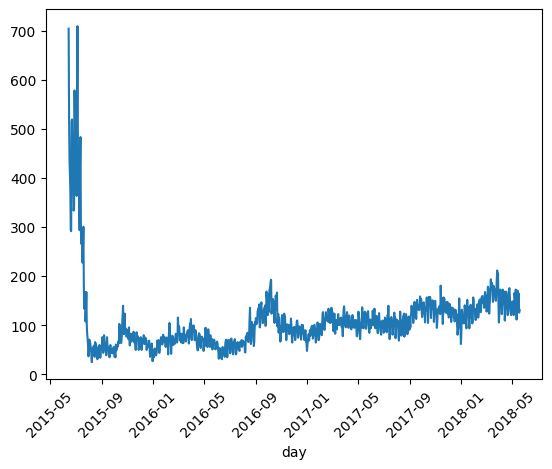

In [11]:
#количество юзеров с течением временем
events_data.groupby('day') \
           .user_id.nunique().plot().tick_params(axis='x', rotation=45)

In [12]:
#Столбиковая диаграмма по месяцам, с учетом только вновь поступивших.
starting_date=events_data.groupby('user_id',as_index=False).date.min()

In [13]:
starting_date.rename(columns={'date':'user_admission_date'},inplace=True)

In [14]:
starting_date['month']=starting_date.user_admission_date.dt.to_period('M')

<Axes: xlabel='month'>

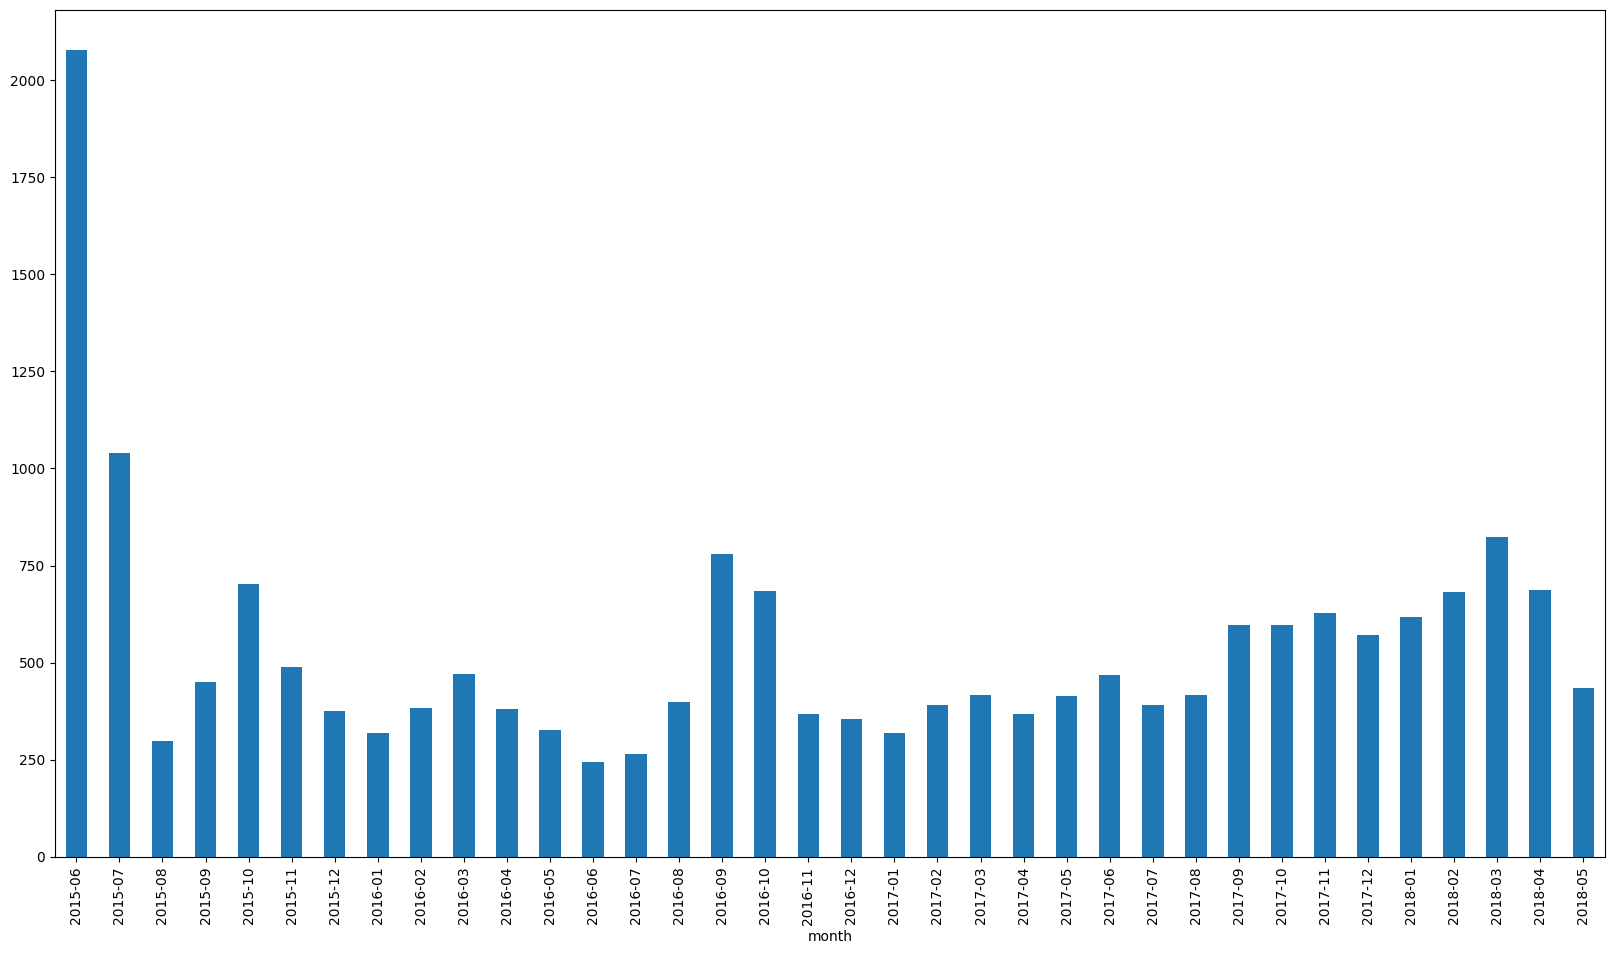

In [15]:
starting_date.groupby('month').user_id.nunique().plot(kind='bar',figsize=(20,11))

<Axes: >

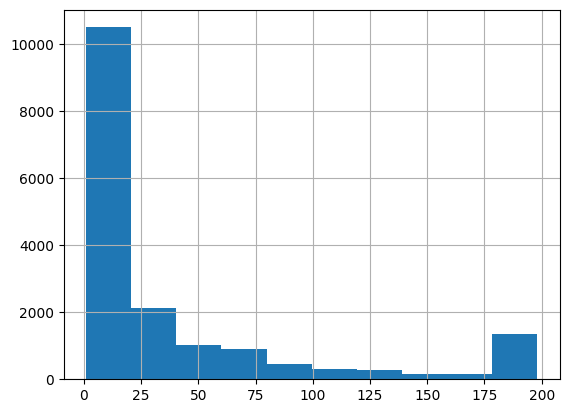

In [16]:
#посчитаем число пройденных степов для каждого пользователя
events_data[events_data.action=='passed']\
.groupby('user_id',as_index=False)\
.agg({'step_id':'count'}).rename(columns={'step_id':'passed_steps'}).passed_steps.hist()
#решение неправильное, потому что нет пользователей с 0 

In [17]:
#правильный способ решения: число пройденных степов для каждого пользователя
#pivot_table - развернет нашу таблицу по колонке action, values - с какими значениями, 
#fill - для заполнения na, reser_index - чтобы action и user_id разъединить
users_events_data = events_data.pivot_table(index='user_id',
                        columns='action',
                        values='step_id', 
                        aggfunc='count',
                       fill_value=0).reset_index()

In [18]:
#Количестов правильных и неправильных сабмитов
users_scores = submissions_data.pivot_table(index='user_id',
                        columns='submission_status',
                        values='step_id', 
                        aggfunc='count',
                       fill_value=0).reset_index()

In [19]:
users_scores

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1
...,...,...,...
9935,26787,3,0
9936,26790,1,0
9937,26794,33,9
9938,26797,2,0


In [20]:
#найдем разницу времени между заходами на курс, уберем повторения так как в один день может быть несколько раз
#apply list - для создания списка
#apply diff - считает разность между ближайшими наблюдениями
gap_data = events_data[['user_id','day','timestamp']].drop_duplicates(subset=['user_id','day'])\
          .groupby('user_id')['timestamp'].apply(list)\
          .apply(np.diff).values

In [21]:
gap_data

array([array([], dtype=int64), array([4843602]),
       array([6899249,  182484,   93710, 2768870,  171400,   78712]), ...,
       array([   86128,   136759,    94899,  1422583, 14347289,   505061,
                 98252,    57019])                                       ,
       array([1567990]), array([], dtype=int64)], dtype=object)

In [22]:
#можно передать массив и делаем в пандоввскую серию
gap_data = pd.Series(np.concatenate(gap_data,axis=0))

In [23]:
gap_data

0         4843602
1         6899249
2          182484
3           93710
4         2768870
           ...   
97867    14347289
97868      505061
97869       98252
97870       57019
97871     1567990
Length: 97872, dtype: int64

In [24]:
#переводим в дни 
gap_data = gap_data / (24*60*60)

<Axes: >

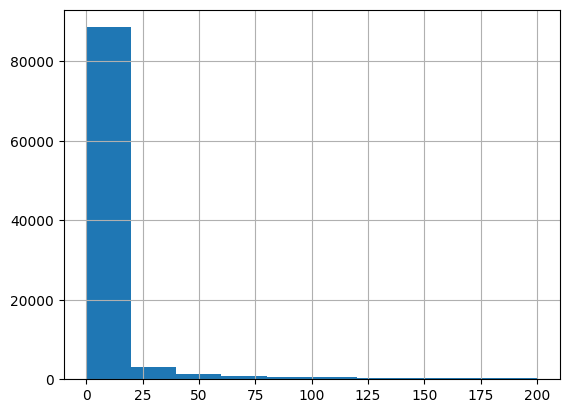

In [25]:
#гистограма с убранными переборами
gap_data[gap_data < 200].hist()

In [26]:
#только 5% пользователей возвращаются на курс после перерыва в 60 дней
gap_data.quantile(0.95)

59.760440972222156

In [27]:
#максимальное нахождение пользователя на курсе
user_data = events_data.groupby('user_id',as_index=False)\
.agg({'timestamp':'max'}).rename(columns={'timestamp':'last_timestamp'})

In [28]:
#now = последний день из выборки
now=1526772811
drop_out_threshold=2592000
#30*24*60*60

In [29]:
#сколько времени прошло с последнего прихода пользователя до сейчас 
#больше ли это 2 месяцев? если да, то это наш выбывший
user_data['is_gone_user']=(now-user_data.last_timestamp) > drop_out_threshold

In [30]:
user_data.head()

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True


In [31]:
#добавим сколько прошел correct и wrong каждый пользователь
user_data.merge(users_scores,how='outer')

,user_id,last_timestamp,is_gone_user,correct,wrong
0,1,1472827464,True,NaN,NaN
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,NaN,NaN
...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0
19230,26793,1510225034,True,NaN,NaN
19231,26794,1512035039,True,33.0,9.0
19232,26797,1509995096,True,2.0,0.0


In [32]:
#заменим na на 0
users_data=user_data.fillna(0)

In [33]:
users_data

,user_id,last_timestamp,is_gone_user
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True
...,...,...,...
19229,26790,1517495987,True
19230,26793,1510225034,True
19231,26794,1512035039,True
19232,26797,1509995096,True


In [34]:
#добавляем actions к данным 
users_data=users_data.merge(users_events_data, how='outer')

In [35]:
users_data

,user_id,last_timestamp,is_gone_user,discovered,passed,started_attempt,viewed
0,1,1472827464,True,1,0,0,1
1,2,1519226966,True,9,9,2,10
2,3,1444581588,True,91,87,30,192
3,5,1499859939,True,11,11,4,12
4,7,1521634660,True,1,1,0,1
...,...,...,...,...,...,...,...
19229,26790,1517495987,True,8,8,1,9
19230,26793,1510225034,True,1,0,1,1
19231,26794,1512035039,True,69,69,34,180
19232,26797,1509995096,True,10,10,2,13


In [36]:
#группируем, чтобы получить число уникальных дней для каждого пользователя, 
#nunique - уникальные, to_frame - для преобразования в таблицу
users_days=events_data.groupby('user_id').day.nunique().to_frame().reset_index()

In [37]:
#добавляем число уникальных дней
users_data=users_data.merge(users_days, how='outer')

In [38]:
#правда ли что прошел 
users_data['passed_corse']= users_data.passed>170

In [39]:
#
users_data.groupby('passed_corse').count()

,user_id,last_timestamp,is_gone_user,discovered,passed,started_attempt,viewed,day
passed_corse,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425


In [40]:
#ищем Карпова
events_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


In [41]:
events_data.user_id.value_counts()

user_id
20907    33043
10794    16436
25279    10179
1046      9095
3572      7905
         ...  
14865        2
3395         2
26502        1
8773         1
11437        1
Name: count, Length: 19234, dtype: int64

In [42]:
submissions_data.user_id.value_counts()

user_id
12265    1051
3643      948
1046      934
14454     920
643       888
         ... 
17245       1
24737       1
477         1
4730        1
9422        1
Name: count, Length: 9940, dtype: int64

In [43]:
submissions_data.query('submission_status == "correct"')\
                                .groupby('user_id', as_index = False)\
                                .agg({'submission_status': 'count'})\
                                .rename(columns = {'submission_status' : 'count_submissions'})\
                               .sort_values('count_submissions', ascending = False).reset_index().head(1)

,index,user_id,count_submissions
0,433,1046,421


In [44]:
events_data.pivot_table(index='user_id', columns='action', values='step_id', aggfunc='count', fill_value=0) \
    .reset_index().sort_values(by=['started_attempt'], ascending=[False]).head(1)

action,user_id,discovered,passed,started_attempt,viewed
781,1046,128,124,721,8122


In [45]:
#часть 2

In [46]:
users_data.head()

,user_id,last_timestamp,is_gone_user,discovered,passed,started_attempt,viewed,day,passed_corse
0,1,1472827464,True,1,0,0,1,1,False
1,2,1519226966,True,9,9,2,10,2,False
2,3,1444581588,True,91,87,30,192,7,False
3,5,1499859939,True,11,11,4,12,2,False
4,7,1521634660,True,1,1,0,1,1,False


In [47]:
#эксперимент: по первым дням понять, уйдет или нет 


<Axes: >

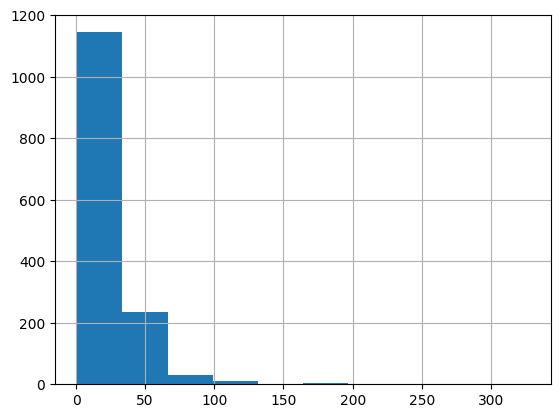

In [48]:
#проверим на адекватность предположение, что 3 дня
users_data[users_data.passed_corse].day.hist()
#видим, что большинству пользователей надо чуть больше 25 дней, значит адекватно

In [49]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [50]:
#создаем колонку с действиями пользователя за его 3 дня

In [51]:
user_min_time=events_data.groupby('user_id', as_index=False)\
    .agg({'timestamp':'min'}) \
    .rename({'timestamp':'min_timestamp'}, axis=1)

In [52]:
user_min_time.head()

,user_id,min_timestamp
0,1,1472827464
1,2,1514383364
2,3,1434358476
3,5,1466156809
4,7,1521634660


In [53]:
users_data=users_data.merge(user_min_time, how='outer')

In [54]:
events_data.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [55]:
events_data_train=pd.DataFrame()

In [56]:
#новая колонка для индекса юзер_время
events_data['user_time'] = events_data.user_id.map(str) + '_' + events_data.timestamp.map(str)

In [57]:
#время за 3 дня 
lerning_time_threshold = 3*24*60*60
lerning_time_threshold

259200

In [58]:
#максимальное значение времени для каждого пользователя, после которого мы не будем использовать его время
user_lerning_time_threshold = user_min_time.user_id.map(str)+ '_' + (user_min_time.min_timestamp + lerning_time_threshold).map(str) 

In [59]:
user_lerning_time_threshold.head()

0    1_1473086664
1    2_1514642564
2    3_1434617676
3    5_1466416009
4    7_1521893860
dtype: object

In [60]:
user_min_time['user_lerning_time_threshold']=user_lerning_time_threshold

In [61]:
#добавляем в нашу основную таблицу
events_data=events_data.merge(user_min_time[['user_id','user_lerning_time_threshold']],how='outer')

In [62]:
events_data.shape

(3480703, 8)

In [63]:
#сравним все события с порогом, и отберем только нужные 
events_data_train = events_data[events_data.user_time <= events_data.user_lerning_time_threshold]

In [64]:
events_data_train.head()

,step_id,timestamp,action,user_id,date,day,user_time,user_lerning_time_threshold
0,31981,1472827464,viewed,1,2016-09-02 14:44:24,2016-09-02,1_1472827464,1_1473086664
1,31981,1472827464,discovered,1,2016-09-02 14:44:24,2016-09-02,1_1472827464,1_1473086664
2,32815,1514383364,discovered,2,2017-12-27 14:02:44,2017-12-27,2_1514383364,2_1514642564
3,32815,1514383364,viewed,2,2017-12-27 14:02:44,2017-12-27,2_1514383364,2_1514642564
4,32815,1514383364,passed,2,2017-12-27 14:02:44,2017-12-27,2_1514383364,2_1514642564


In [65]:
#проверим, что в наших данных только нужная информация
events_data_train.groupby('user_id').day.nunique().max()

4

In [66]:
#найти на каком степе больше всего пользователей застряло
submissions_data.mode()

,step_id,timestamp,submission_status,user_id,date,day
0,31978,1491590313,wrong,12265,2017-04-07 18:38:33,2015-07-06


In [67]:
submissions_data.query('submission_status=="wrong"').step_id.value_counts()

step_id
31978    16084
32031    13373
32202    13002
33481    10300
32075    10003
         ...  
33482      707
33681      703
33362      673
32175      342
32929       85
Name: count, Length: 76, dtype: int64

In [68]:
#проделали с submission data тоже самое, что с event
submissions_data['users_time'] = submissions_data.user_id.map(str) + '_' + submissions_data.timestamp.map(str) 
submissions_data = submissions_data.merge(user_min_time[['user_id', 'user_lerning_time_threshold']], how='outer') 
submissions_data_train = submissions_data[submissions_data.users_time <= submissions_data.user_lerning_time_threshold] 
submissions_data_train.groupby('user_id').day.nunique().max()

4

In [69]:
#число уникальных дней
X = submissions_data_train.groupby('user_id').day.nunique().to_frame().reset_index()\
    .rename(columns={'day':'days'})

In [70]:
#сколько степов попытался решить за первые три дня
steps_tried = submissions_data_train.groupby('user_id').step_id.nunique().to_frame().reset_index()\
    .rename(columns={'step_id':'steps_tried'})

In [71]:
steps_tried.head()

,user_id,steps_tried
0,2,2
1,3,4
2,8,11
3,14,1
4,16,23


In [72]:
#добавим в X
X=X.merge(steps_tried, on='user_id',  how='outer')

In [73]:
X.shape

(8913, 3)

In [74]:
#количество попыток и правильно/неправильно для каждого пользователя
X=X.merge(submissions_data_train.pivot_table(index='user_id',
                        columns='submission_status',
                        values='step_id', 
                        aggfunc='count',
                       fill_value=0).reset_index())

In [75]:
#добавим колонку сколько правильных ответов от всех попыток пользователь дал
X['correct_ratio'] = X.correct/(X.correct+X.wrong) 

In [76]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio
0,2,1,2,2,0,1.00
1,3,1,4,4,4,0.50
2,8,1,11,9,21,0.30
3,14,1,1,0,1,0.00
4,16,3,23,23,27,0.46


In [77]:
#сколько было просмотрено степов суммарно
X = X.merge(events_data_train.pivot_table(index='user_id',
                        columns='action',
                        values='step_id', 
                        aggfunc='count',
                       fill_value=0).reset_index()[['user_id','viewed']],how='outer')

In [78]:
#заполнить пропуски 
X=X.fillna(0)

In [79]:
#расширим X, закончил ли успешно и что не пытается это сделать
X=X.merge(users_data[['user_id','passed_corse','is_gone_user']], how='outer')

In [80]:
#фильтр с НЕ
X=X[~((X.is_gone_user==False) & (X.passed_corse==False))]

In [81]:
X.head()

,user_id,days,steps_tried,correct,wrong,correct_ratio,viewed,passed_corse,is_gone_user
0,1,0.0,0.0,0.0,0.0,0.0,1,False,True
1,2,1.0,2.0,2.0,0.0,1.0,9,False,True
2,3,1.0,4.0,4.0,4.0,0.5,20,False,True
3,5,0.0,0.0,0.0,0.0,0.0,1,False,True
4,7,0.0,0.0,0.0,0.0,0.0,1,False,True


In [82]:
#группировка и подсчет 
X.groupby(['passed_corse','is_gone_user']).user_id.count()

passed_corse  is_gone_user
False         True            16560
True          False             141
              True             1284
Name: user_id, dtype: int64

In [83]:
#y
y=X.passed_corse.map(int)

In [84]:
#уберем лишние колонки 
X=X.drop(['passed_corse','is_gone_user'],axis=1)

In [85]:
#переведем user_id в индекс, и убираем эту колонку
X.set_index(X.user_id)
X=X.drop('user_id',axis=1)